<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/Popularidad_de_una_canci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 714.2428 - mae: 21.5989 - val_loss: 485.3206 - val_mae: 18.1858
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 482.3003 - mae: 18.1622 - val_loss: 477.3633 - val_mae: 18.0795
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 471.1567 - mae: 17.9276 - val_loss: 469.5308 - val_mae: 17.8109
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 471.4903 - mae: 17.8988 - val_loss: 467.6338 - val_mae: 17.7189
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 466.2769 - mae: 17.7548 - val_loss: 463.2331 - val_mae: 17.6447
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 462.4430 - mae: 17.6546 - val_loss: 462.3747 - val_mae: 17.6232
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 462.1082 - mae: 17.6440 - val_loss: 460.3140 - val_mae: 17.5574
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 459.4263 - mae: 17.5687 - val_loss: 460.4925 - val_mae: 17.5547
Epo

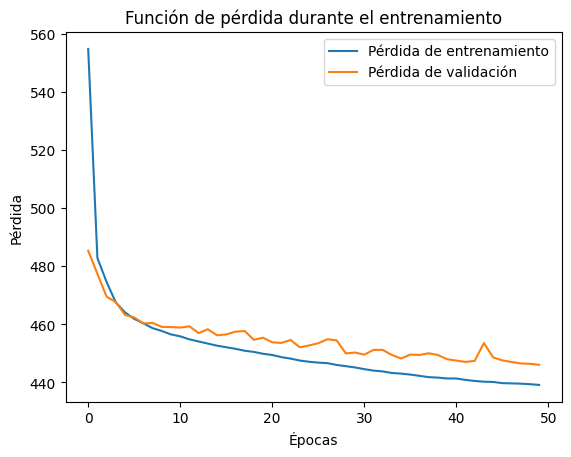

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 446.2946 - mae: 17.1827
MAE en el conjunto test: 17.11608123779297
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
   Actual  Predicted
0      50  43.824165
1      11  13.723415
2       0  23.587870
3       0  28.597652
4      57  35.303364
Canciones encontradas:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 42.17
R²: 0.1046556830406189
MSE: 441.8353576660156


In [1]:
# Duration_ms (duración en milisegundos)
#
# Además, incluye datos cuantitativos como el nombre del artista, el género musical y si explícita o no.

# ------------------------------------------------------
# Cargamos el dataset
# ------------------------------------------------------

import pandas as pd

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)

# Visualizamos el dataframe
df

# ------------------------------------------------------
# Preprocesamiento de datos
# ------------------------------------------------------

# Definimos los paámetros y el target

# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
# X serán las características que usaremos como entrada al modelo
X = df[features].values

# Target numérico: popularidad de la canción
y = df['popularity'].values

# ------------------------------------------------------
# Dividir el conjunto en datos de entrenamiento y prueba
# ------------------------------------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

# ------------------------------------------------------
# Normalizar los parámetros de entrada
# ------------------------------------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ajustamos el scaler con X_train y transformamos X_train
X_train = scaler.fit_transform(X_train)
# Transformamos X_test con los mismos parámetros
X_test = scaler.transform(X_test)

# ------------------------------------------------------
# Red neuronal multicapa
# ------------------------------------------------------

# Definir el modelo de red neuronal

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(32, activation='relu'),                                   # Capa oculta 2
    Dense(1, activation='linear')                                   # Capa de salida para regresión
])

# ------------------------------------------------------
# Compilar el modelo
# ------------------------------------------------------

# Crear un optimizador Adam con una tasa de aprendizaje del 0.001
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=adam_optimizer,
    loss='mse',          # Error cuadrático medio como función de pérdida (regresión)
    metrics=['mae'],     # Métrica MAE para monitoreo
)

# Se compila el modelo utilizando el optimizador Adam y la función de pérdida MSE.

# ------------------------------------------------------
# Entrenar el modelo
# ------------------------------------------------------

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,  # 20% de validación tomada del conjunto de entrenamiento
    epochs=50,
    batch_size=50,
)

# Se entrena el modelo en los datos de entrenamiento utilizando fit.
# validation_split permite monitorear val_loss/val_mae durante el entrenamiento.

# ------------------------------------------------------
# Graficando la función de pérdida
# ------------------------------------------------------

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

# Note que la función de pérdida debe tender hacia cero, para poder decir que el modelo esta teniendo un aprendizaje correcto.

# ------------------------------------------------------
# Evaluación
# ------------------------------------------------------

loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")

# Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando evaluate.
# Se obtienen la pérdida (MSE) y la métrica MAE en los datos de prueba.

# ------------------------------------------------------
# Predicción
# ------------------------------------------------------

# Hacer predicciones y compararlas con los valores reales
import pandas as pd

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

# ------------------------------------------------------
# Seleccionar una canción en específico
# ------------------------------------------------------

nombre_cancion = "Beso"

# Filtramos canciones cuyo nombre contenga el texto buscado (insensible a mayúsculas)
canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]

print(f"Canciones encontradas:")
# Mostramos las columnas informativas: nombre, artista y álbum
canciones_df[['track_name', 'artists', 'album_name']].head()

# ------------------------------------------------------
# Predecir la popularidad de una canción seleccionada
# ------------------------------------------------------

# índice a seleccionar (por ejemplo la primera coincidencia)
i = 0
cancion = canciones_df.iloc[i]

# Tomamos las features de la canción y preprocesamos con el mismo scaler
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

# Hacemos la predicción sobre la canción seleccionada
prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")

# ------------------------------------------------------
# Otras métricas
# ------------------------------------------------------

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
